In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('zoo.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.shape

(101, 18)

In [19]:
data['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [20]:
#check if there are duplicates in animal_name
duplicates = data['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [21]:
frog = data[data['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
25,frog,0,0,1,0,0,1,1,1,1,...,0,0,0,5,0,0,1,0,0,0
26,frog,0,0,1,0,0,1,1,1,1,...,0,0,0,5,0,0,1,0,0,0


In [22]:
# observation: find that one frog is venomous and another one is not 
# change the venomous one into frog2 to seperate 2 kinds of frog 
data['animal name'][(data['venomous'] == 1 )& (data['animal name'] == 'frog')] = "frog2"

In [23]:
data['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [24]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,...,0.742574,0.128713,0.435644,2.831683,0.227723,0.267327,0.376238,0.009901,0.099010,0.019802
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,...,0.439397,0.336552,0.498314,2.102709,0.421454,0.444772,0.486857,0.099504,0.300165,0.140014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in data.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

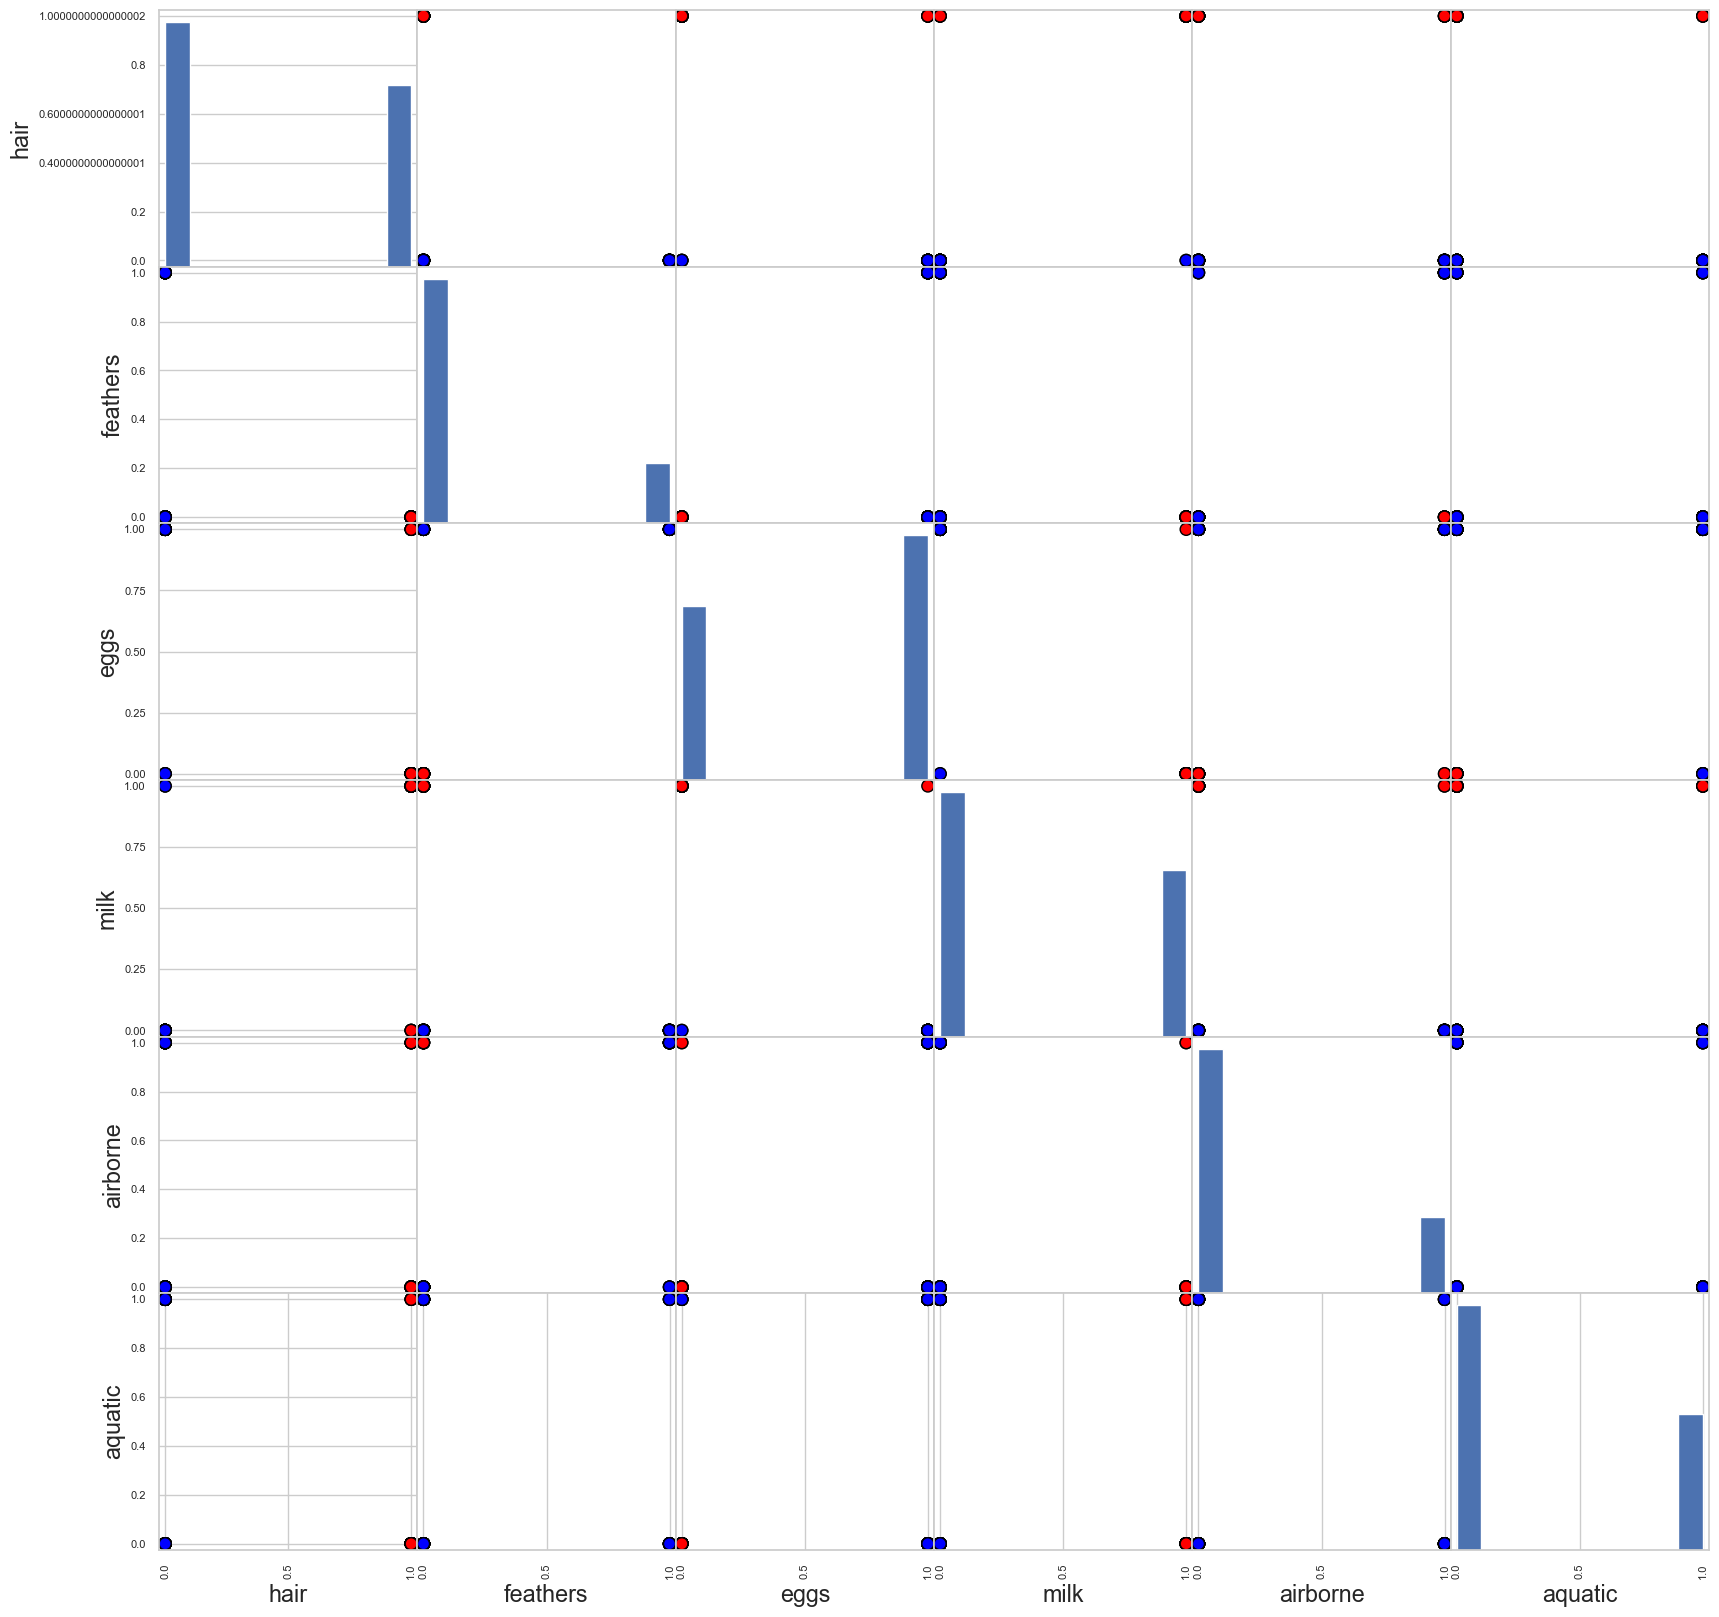

In [26]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(data.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

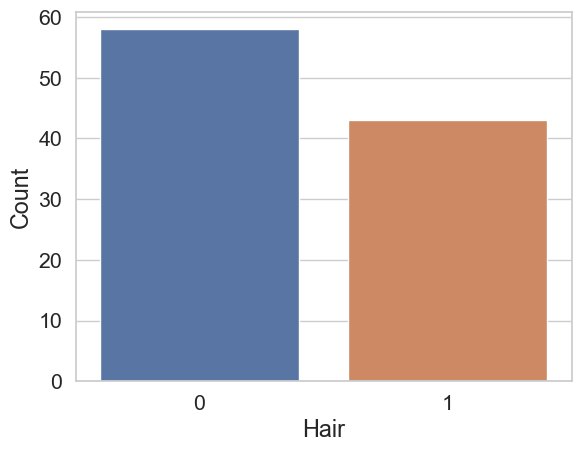

0    58
1    43
Name: hair, dtype: int64

In [27]:
sns.countplot(x="hair", data=data)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
data.loc[:,'hair'].value_counts()

[]

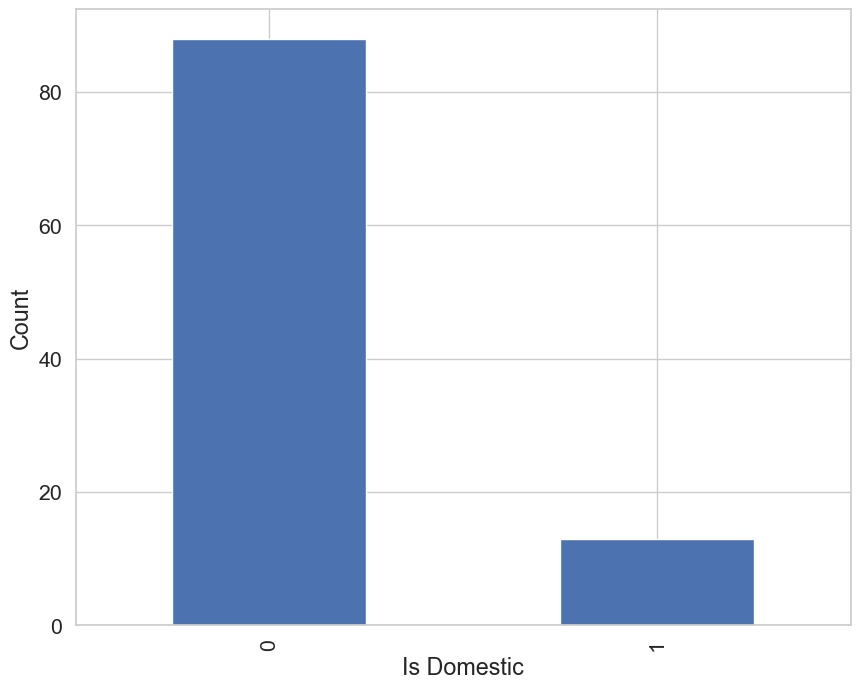

In [28]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
data['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

In [29]:
pd.crosstab(data['type'], data['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


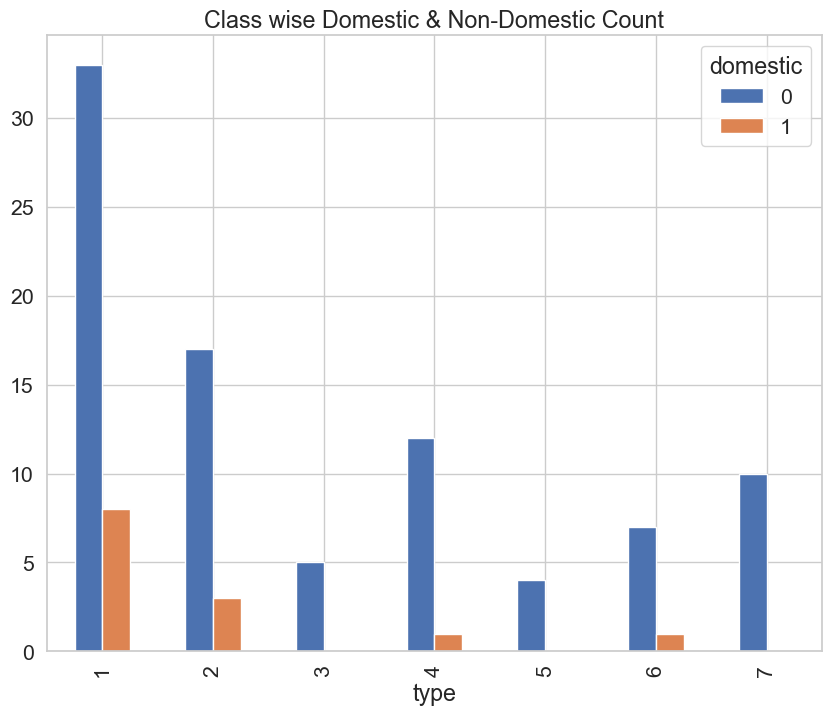

In [30]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(data['type'], data['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [31]:
data['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [32]:
pd.crosstab(data['type'], data['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


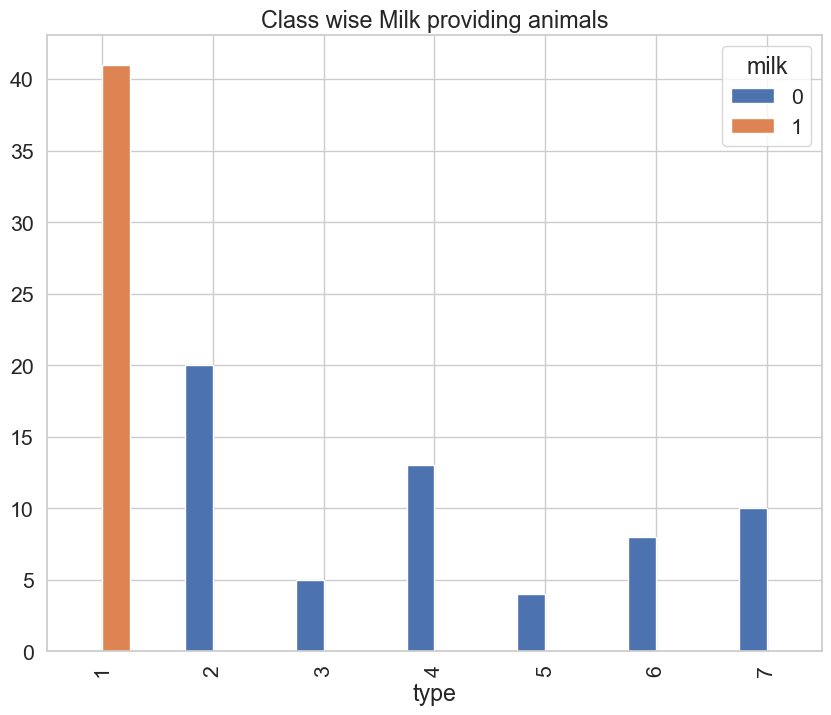

In [33]:
pd.crosstab(data['type'], data['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [34]:
# lets find out all the aquatic animals.
data.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class

0    65
1    36
Name: aquatic, dtype: int64

In [35]:
data[data['aquatic']==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

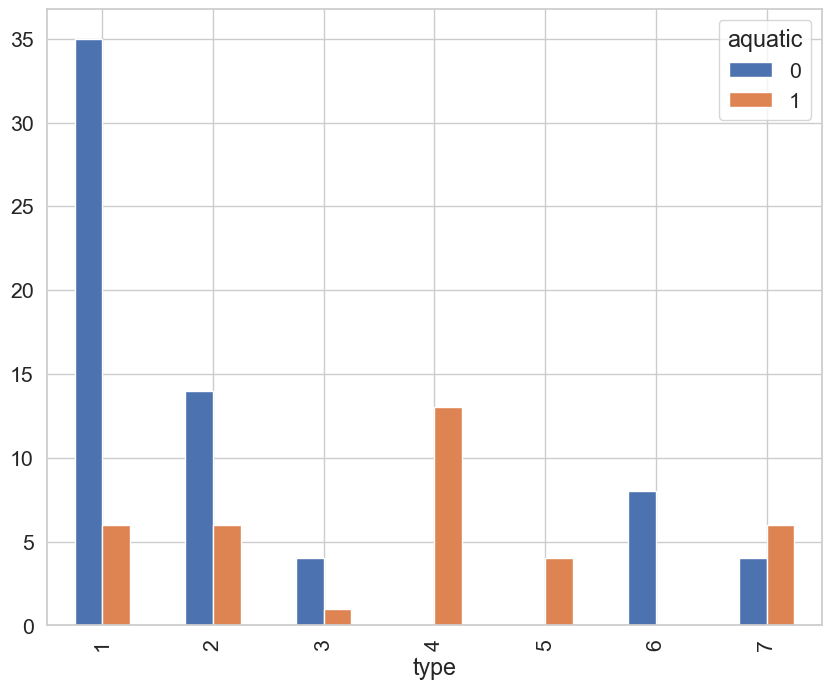

In [36]:
pd.crosstab(data['type'], data['aquatic']).plot(kind="bar", figsize=(10, 8));

In [37]:
# finding Unique value of class_type
type_list = [i for i in data.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

# Split data into train and test

In [39]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:16]
Y = data.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [41]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
37,0,1,1,0,1,0,1,0,1,1,0,0,1,0,0
81,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1
56,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1
60,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1


In [48]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
19,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1
89,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0
43,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0


In [43]:
num_folds = 10
kfold = KFold(n_splits=10)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    13
2     6
4     5
7     4
5     1
6     1
3     1
dtype: int64

In [47]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,13,0,0,0,0,0,0
2,0,6,0,0,0,0,0
3,0,0,1,1,0,0,0
4,0,0,0,4,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,1,1
7,0,0,0,0,0,0,3


In [50]:
#Accuracy
np.mean(preds==Y_test)

0.9354838709677419

In [51]:
model.score(X_train,Y_train)

0.9428571428571428

In [53]:
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 93.54838709677419


In [55]:
results = cross_val_score(model, X, Y, cv=kfold)

In [56]:
print(results.mean()*100)

93.0


In [57]:
print(results.std()*100)

7.810249675906652


# Grid search for algorithm Tuning

In [61]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)


In [62]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [63]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 1}


After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm

# Visualizing CV results

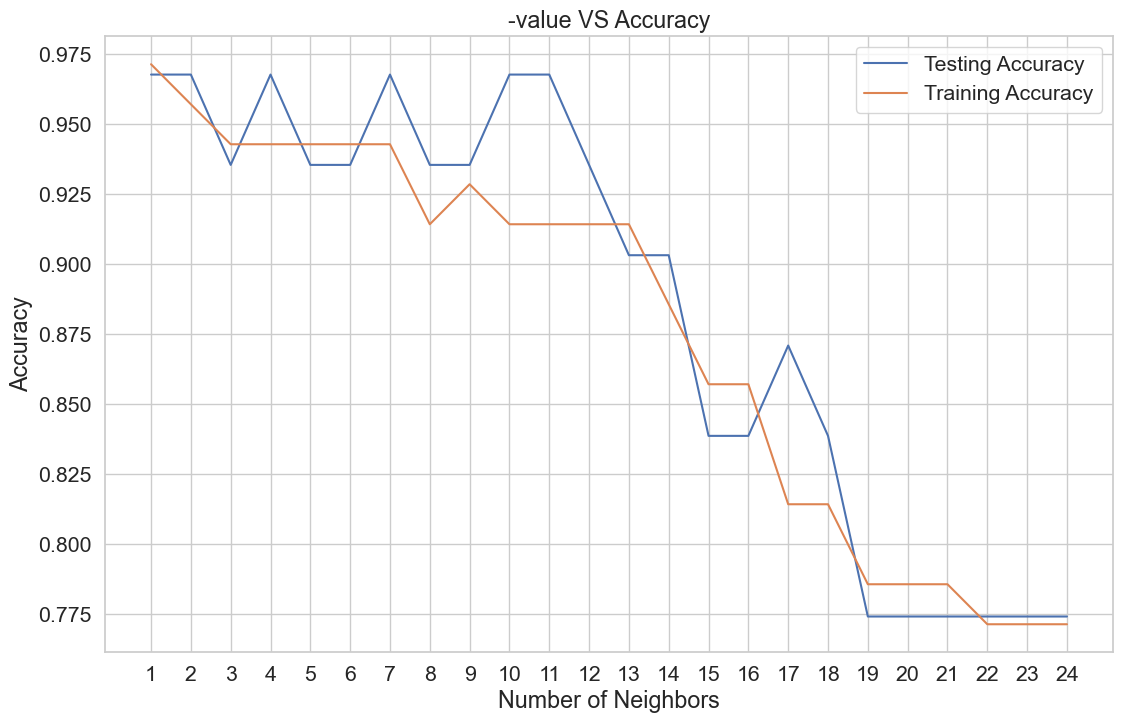

Best accuracy is 0.967741935483871 with K = 1


In [64]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,Y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

We could see that the model accuracy is very good for k values smaller than 5 and as the value increases the accuracy goes on decreasing